<a href="https://colab.research.google.com/github/svf5398/ParentPaper/blob/main/Adult2018_Feature_Engineering_%26_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult 2018 Dataset: Feature Engineering**

In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = pd.read_csv('Adult-Data2018.csv', na_values='?')
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
data.drop(['Screening Type'] ,  axis = 1, inplace = True)
data.drop(['Case No'] ,  axis = 1, inplace = True)
data.replace("?",np.nan,inplace=True) #replace ? with nan

In [2]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
A1,0,0.0
A2,0,0.0
User,0,0.0
Language,0,0.0
Score,0,0.0
Why taken the screening,0,0.0
Used_App_Before,0,0.0
Residence,0,0.0
Family_ASD,0,0.0
Jaundice,0,0.0


# No Missing Data

# ANOVA

In [3]:
X_Feature = data.iloc[:,0:19]  #independent columns
Y_Feature = data.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

                     Feature      Score
0                         A1   3.244862
1                         A2   2.164422
2                         A3   4.084455
3                         A4   3.178056
4                         A5   5.213446
5                         A6   3.756774
6                         A7   1.384959
7                         A8   1.237777
8                         A9   3.080772
9                        A10   3.485773
10                       Age   2.068059
11                       Sex   0.920323
12                 Ethnicity   9.289226
13                 Jaundice    2.505607
14                Family_ASD   3.345210
15                 Residence  10.706749
16           Used_App_Before   0.624815
17  Why taken the screening    1.311792
18                     Score   7.320001


In [4]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
       Feature      Score
15   Residence  10.706749
12   Ethnicity   9.289226
18       Score   7.320001
4           A5   5.213446
2           A3   4.084455
5           A6   3.756774
9          A10   3.485773
14  Family_ASD   3.345210
0           A1   3.244862
3           A4   3.178056
8           A9   3.080772
13   Jaundice    2.505607
1           A2   2.164422
10         Age   2.068059
6           A7   1.384959


# Chi

In [5]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1,8.286946
1,A2,11.007706
2,A3,19.606614
3,A4,14.400288
4,A5,24.062725
5,A6,24.748272
6,A7,7.685636
7,A8,4.345684
8,A9,19.115925
9,A10,13.431973


In [6]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
       Feature        Score
15   Residence  1246.695585
12   Ethnicity   140.631704
18       Score    87.608180
10         Age    74.779026
14  Family_ASD    27.425712
5           A6    24.748272
4           A5    24.062725
13   Jaundice     22.310303
2           A3    19.606614
8           A9    19.115925
3           A4    14.400288
9          A10    13.431973
1           A2    11.007706
0           A1     8.286946
6           A7     7.685636


# Correlation

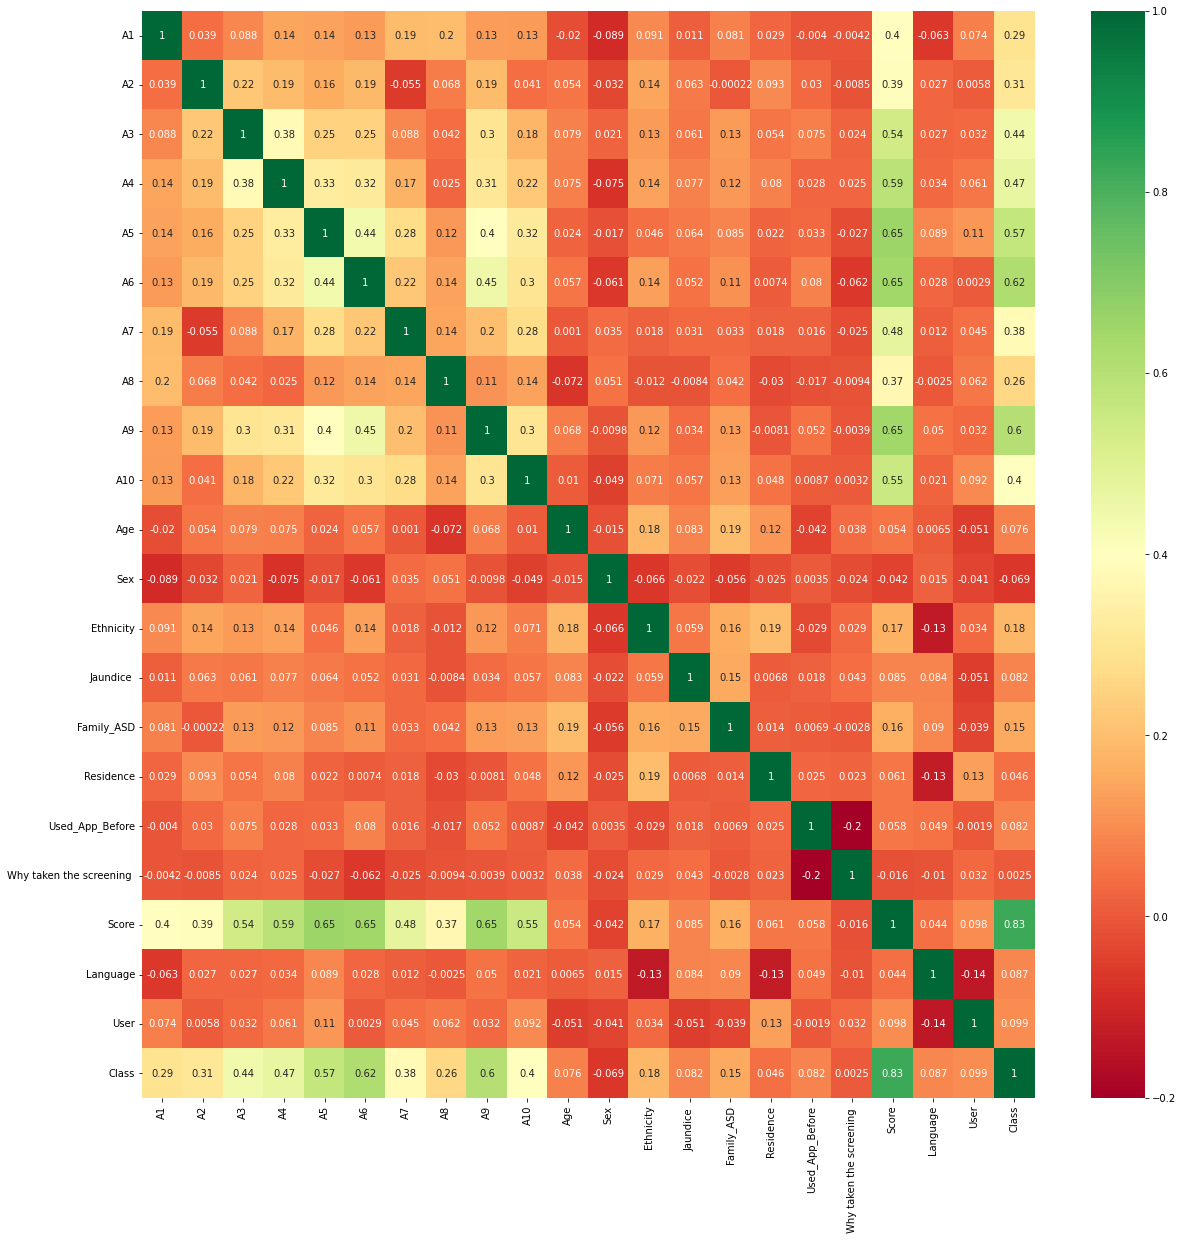

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Adult 2018 Dataset: Model**

In [9]:
import time
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  LabelEncoder
import pandas as pd
import numpy as np
data = pd.read_csv('Adult-Data2018.csv', na_values='?')
data.rename(columns={'Class': 'class'}, inplace=True)

for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))

names = []
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

X=data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6','A7', 'A8', 'A9', 'A10']]
Y=data['class']

# Cross Validation

In [11]:
seed = 7
kfold = KFold(n_splits=10) # removed parameter "random state=seed" because it gave an error. Removing parameter did not affect output
for name, m in models:
    start_time = time.time()
    pred = cross_val_predict(m, X,Y, cv=kfold )
    elapsed_time = time.time() - start_time   
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    error = (FP + FN) / float(TP + TN + FP + FN) # equal #error_rate = 1 - accuracy
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================')     

LR
0.4308
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.2999
96.1538
96.5789
95.2514
95.9152
94.0690
3.8462
CART
0.1113
95.2594
96.0526
93.5754
94.8140
92.6694
4.7406
NB
0.1719
96.2433
97.8947
92.7374
95.3161
94.0510
3.7567
KNN
0.4516
95.6172
96.1842
94.4134
95.2988
93.2414
4.3828
SVM
0.5412
99.6422
99.8684
99.1620
99.5152
99.4398
0.3578
AB
3.8648
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
3.0181
98.4794
99.0789
97.2067
98.1428
97.6157
1.5206
RF
5.2604
96.6011
97.3684
94.9721
96.1702
94.7075
3.3989
ET
4.3946
96.0644
97.5000
93.0168
95.2584
93.8028
3.9356


# Leave

In [12]:
num_folds = 10               # 12 minutes to run
for name, m in models: 
    loocv = LeaveOneOut() 
    start_time=time.time()
    pred = cross_val_predict(m, X,Y, cv=loocv )
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================')

LR
23.2824
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
11.0750
95.9750
96.3158
95.2514
95.7836
93.8102
4.0250
CART
5.3364
97.1377
96.9737
97.4860
97.2299
95.6164
2.8623
NB
5.4179
96.6011
97.7632
94.1341
95.9486
94.6629
3.3989
KNN
7.6380
96.4222
96.8421
95.5307
96.1864
94.4751
3.5778
SVM
18.0838
99.8211
99.8684
99.7207
99.7945
99.7207
0.1789
AB
127.5324
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
132.5019
99.1055
99.4737
98.3240
98.8989
98.5994
0.8945
RF
216.7193
97.6744
98.0263
96.9274
97.4768
96.3889
2.3256
ET
172.6875
96.7800
97.3684
95.5307
96.4496
95.0000
3.2200


# Train Test Split

In [13]:
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
for name, m in models:
    model = m
    start_time = time.time()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y_test,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y_test, pred, average='binary')
    AUC=metrics.roc_auc_score(Y_test, pred)
    class_error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(class_error*100.0))
    print(' ============================')

LR
0.0177
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.0085
95.8333
95.6522
96.2264
95.9393
93.5780
4.1667
CART
0.0062
94.0476
94.7826
92.4528
93.6177
90.7407
5.9524
NB
0.0064
97.0238
98.2609
94.3396
96.3002
95.2381
2.9762
KNN
0.0360
94.6429
96.5217
90.5660
93.5439
91.4286
5.3571
SVM
0.0227
99.4048
100.0000
98.1132
99.0566
99.0476
0.5952
AB
0.2035
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
0.1864
99.7024
99.5652
100.0000
99.7826
99.5305
0.2976
RF
0.3473
96.7262
96.9565
96.2264
96.5915
94.8837
3.2738
ET
0.4078
96.4286
96.9565
95.2830
96.1198
94.3925
3.5714
